In [1]:
import sys
import os
import random
from collections import Counter
import numpy as np
# Package
import somhos.resources.dataset as rd
import somhos.resources.queries as rq
from somhos.methods.useful import save_pickle, load_pickle
from somhos.config.paths import get_relative_path
from somhos.config.paths import DOCS_SAMPLE_A_SUFFIX, DOCS_SAMPLE_B_SUFFIX
from somhos.config.paths import DOCS_SAMPLES_CONTENT, DOCS_SAMPLES_WORD_COUNT
from somhos.config.paths import DOCS_SAMPLES_WORD_DOC_COUNT
# Matrices
from somhos.config.paths import DOCS_SAMPLES_JACCARD_SIM, DOCS_SAMPLES_JACCARD_SIM_UDV
from somhos.config.paths import DOCS_SAMPLES_JACCARD_SIM_KPS, DOCS_SAMPLES_JACCARD_SIM_UDV_KPS
# Kps
from somhos.config.paths import KPS_DIRECTORY_INVERSE_SUFFIX, KPS_DIRECTORY_SUFFIX, KPS_NORMALIZED_SUFFIX

Default path

In [2]:
data_path = "../../src/somhos/resources/aminer/v9"

Load samples

In [3]:
# Load sample A
docs_sample_a_path = get_relative_path(data_path, DOCS_SAMPLE_A_SUFFIX)
docs_sample_a = load_pickle(docs_sample_a_path)
# Load sample B
docs_sample_b_path = get_relative_path(data_path, DOCS_SAMPLE_B_SUFFIX)
docs_sample_b = load_pickle(docs_sample_b_path)

print("Samples size: (%d, %d)" % (len(docs_sample_a), len(docs_sample_b)))

Samples size: (1000, 1000)


Load samples content

In [4]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 2000


Load Jaccard similarities

In [5]:
docs_samples_jaccard_sim_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM)
m_jaccard_sim = load_pickle(docs_samples_jaccard_sim_path)
print(m_jaccard_sim)

[[0.03292181 0.03518519 0.00714286 ... 0.04385965 0.02083333 0.04580153]
 [0.04471545 0.0291439  0.02797203 ... 0.05627706 0.00657895 0.03623188]
 [0.03508772 0.02448211 0.008      ... 0.04205607 0.04761905 0.05172414]
 ...
 [0.03508772 0.01492537 0.02439024 ... 0.04205607 0.03125    0.02521008]
 [0.0361991  0.03468208 0.01709402 ... 0.04854369 0.02459016 0.        ]
 [0.05172414 0.01845018 0.         ... 0.03125    0.02189781 0.03174603]]


In [6]:
docs_samples_jaccard_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV)
m_udv_jaccard_sim = load_pickle(docs_samples_jaccard_sim_udv_path)
print(m_udv_jaccard_sim)

[[0.04361271 0.0460296  0.02870448 ... 0.04959599 0.02688767 0.03650811]
 [0.03771801 0.03980823 0.02482477 ... 0.04289259 0.02325353 0.03157367]
 [0.04338416 0.04578839 0.02855405 ... 0.04933609 0.02674677 0.03631679]
 ...
 [0.03332177 0.03516837 0.02193131 ... 0.03789323 0.02054321 0.02789359]
 [0.03247137 0.03427084 0.02137161 ... 0.03692616 0.02001893 0.02718172]
 [0.03512217 0.03706854 0.02311628 ... 0.03994062 0.02165317 0.02940069]]


In [7]:
docs_samples_jaccard_sim_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_KPS)
m_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_kps_path)
print(m_jaccard_sim_kps)

[[0.         0.         0.         ... 0.01960784 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01785714 0.         0.02857143]
 ...
 [0.         0.         0.         ... 0.         0.03846154 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02040816 0.         0.         ... 0.         0.         0.        ]]


In [8]:
docs_samples_jaccard_sim_udv_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV_KPS)
m_udv_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_udv_kps_path)
print(m_udv_jaccard_sim_kps)

[[0.00088732 0.00074947 0.00072513 ... 0.00090514 0.00039251 0.00080765]
 [0.00178591 0.00150847 0.00145948 ... 0.00182178 0.00079    0.00162555]
 [0.00490652 0.00414428 0.00400969 ... 0.00500508 0.00217041 0.00446596]
 ...
 [0.00330685 0.00279312 0.00270241 ... 0.00337327 0.00146279 0.00300993]
 [0.00058503 0.00049415 0.0004781  ... 0.00059678 0.00025879 0.0005325 ]
 [0.00360416 0.00304425 0.00294538 ... 0.00367656 0.00159431 0.00328055]]


Means of jaccard similarities

In [9]:
m_ref = m_jaccard_sim_kps
# Means sample a
means_sample_a = np.divide(np.sum(m_ref, axis=1), len(docs_sample_b))
# Means sample b
means_sample_b = np.divide(np.sum(m_ref, axis=0), len(docs_sample_a))
# Ordered means
ordered_indices_m = means_sample_a.argsort()[::-1]
ordered_indices_n = means_sample_b.argsort()[::-1]

Order matrices by means

In [10]:
m_jaccard_sim = m_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim = m_udv_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_jaccard_sim_kps = m_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim_kps = m_udv_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n] 

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['figure.dpi']= 250
mpl.rcParams['image.cmap'] = 'jet'
mpl.rcParams['image.interpolation'] = 'none'
mpl.rcParams['image.lut'] = 0
mpl.rcParams['image.resample'] = False

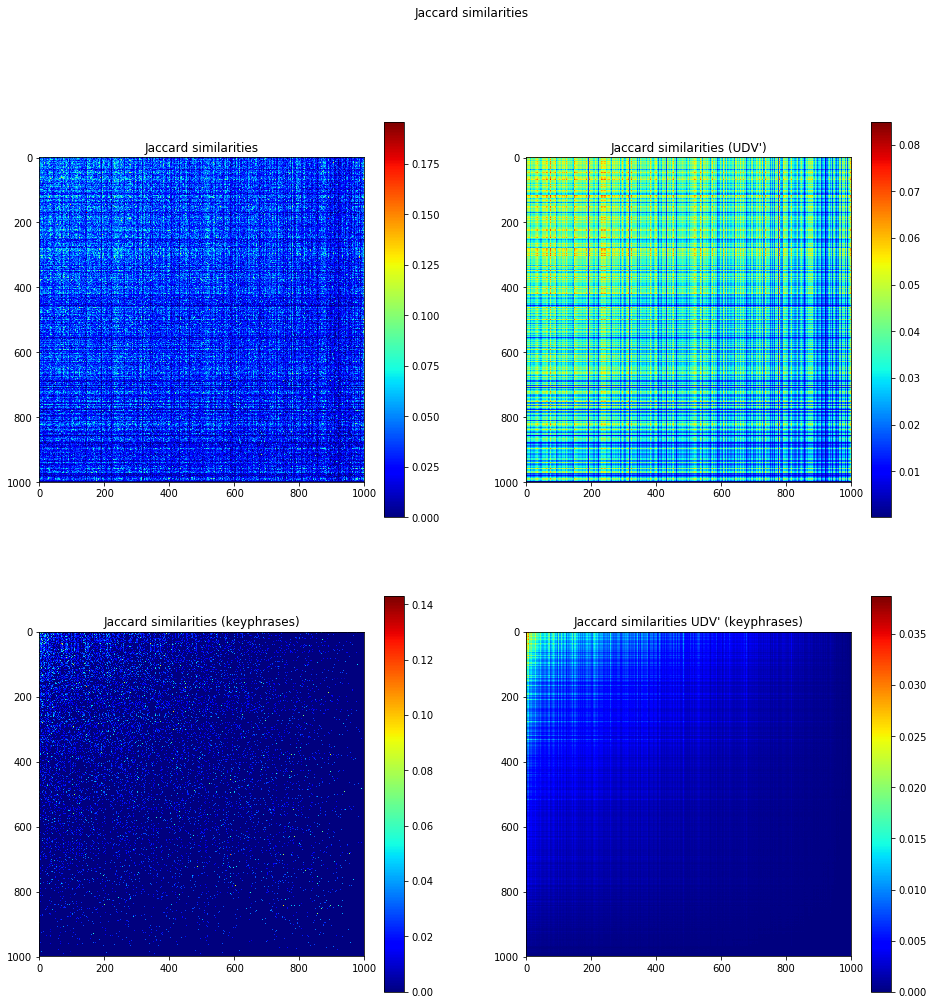

In [12]:
fig = plt.figure(figsize=(16,16))
fig.suptitle("Jaccard similarities")

# Words
ax_jaccard_sim = plt.subplot(2, 2, 1)
ax_jaccard_sim.set_title("Jaccard similarities")
im_jaccard_sim = ax_jaccard_sim.imshow(m_jaccard_sim)
plt.colorbar(im_jaccard_sim)
# Reconstructed matrix using the largest singular value.
ax_jaccard_sim_udv = plt.subplot(2, 2, 2)
ax_jaccard_sim_udv.set_title("Jaccard similarities (UDV')")
im_jaccard_sim_udv = ax_jaccard_sim_udv.imshow(m_udv_jaccard_sim)
plt.colorbar(im_jaccard_sim_udv)

# Keyphrases
ax_jaccard_sim_kps = plt.subplot(2, 2, 3)
ax_jaccard_sim_kps.set_title("Jaccard similarities (keyphrases)")
im_jaccard_sim_kps = ax_jaccard_sim_kps.imshow(m_jaccard_sim_kps)
plt.colorbar(im_jaccard_sim_kps)
# Reconstructed matrix using the largest singular value.
ax_jaccard_sim_udv_kps = plt.subplot(2, 2, 4)
ax_jaccard_sim_udv_kps.set_title("Jaccard similarities UDV' (keyphrases)")
im_jaccard_sim_udv_kps = ax_jaccard_sim_udv_kps.imshow(m_udv_jaccard_sim_kps)
plt.colorbar(im_jaccard_sim_udv_kps)

# l b w h 
# cax = plt.axes([0.98, 0.1, 0.05, 0.8])
# plt.colorbar(im_jaccard_sim, cax=cax)
plt.show()

Get content

In [13]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 2000


Order docs and get less similar

In [16]:
docs_a = list(np.array(docs_sample_a)[ordered_indices_m])
docs_b = list(np.array(docs_sample_b)[ordered_indices_n])
start_offset = 0
end_offset = start_offset + 10

for doc_a in docs_a[start_offset:end_offset]:
    for doc_b in docs_b[start_offset:end_offset]:
        content_a = samples_content[doc_a]
        content_b = samples_content[doc_b]
        i = docs_a.index(doc_a)
        j = docs_b.index(doc_b)
        # bow
        intersection_bow = content_a['bag-of-words'] & content_b['bag-of-words']
        # kps
        intersection_bok = content_a['bag-of-kps'] & content_b['bag-of-kps']
        if m_jaccard_sim_kps[i,j] == 0.0 or len(intersection_bok) <= 2:
            continue
        print("(%d, %d) = %f b-o-w" % (i, j, m_jaccard_sim[i,j]), intersection_bow if intersection_bow else "")
        print("(%d, %d) = %f b-o-k" % (i, j, m_jaccard_sim_kps[i,j]), intersection_bok if intersection_bok else "")
        print("-------")

(0, 0) = 0.044444 b-o-w {'networks', 'solutions', 'number', 'solution', 'user', 'work', 'system', 'efficient', 'both', 'network', 'due', 'resources'}
(0, 0) = 0.040000 b-o-k {b'network', b'solution', b'user'}
-------
(1, 0) = 0.067669 b-o-w {'large', 'using', 'well', 'solution', 'which', 'results', 'also', 'solving', 'such', 'algorithm', 'algorithms', 'applications', 'our', 'known', 'provide', 'use', 'impact', 'examples'}
(1, 0) = 0.044776 b-o-k {b'algorithm', b'solution', b'examples'}
-------
(1, 8) = 0.096552 b-o-w {'approximation', 'analyses', 'approach', 'solution', 'method', 'results', 'solving', 'algorithm', 'problem', 'algorithms', 'but', 'use', 'based', 'optimization'}
(1, 8) = 0.129032 b-o-k {b'algorithms', b'solution', b'optimization problem', b'algorithm'}
-------
(2, 2) = 0.062500 b-o-w {'control', 'also', 'other', 'system', 'algorithm', 'algorithms', 'evaluate', 'proposed', 'mean', 'two', 'network', 'parameters', 'analyze', 'based'}
(2, 2) = 0.062500 b-o-k {b'algorithm', b